In [6]:
#PARA QUARTERLY
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ticker='MSFT'
company='microsoft' #colocar en minuscula nombre de la empresa

# URL de la página que deseas hacer scraping
url = f"https://www.macrotrends.net/stocks/charts/{ticker}/{company}/eps-earnings-per-share-diluted"

In [3]:
# Definir un encabezado de agente de usuario (User-Agent) para simular una solicitud de navegador
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
}

# Realiza una solicitud GET a la URL con el encabezado de agente de usuario
response = requests.get(url, headers=headers)

In [5]:
# Comprueba si la solicitud fue exitosa (código de respuesta 200)
if response.status_code == 200:
    # Parsea el contenido HTML con BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

    # Encuentra todas las tablas con la clase 'historical_data_table'
    tables = soup.find_all('table', class_='historical_data_table')

    # Itera a través de las tablas y selecciona la segunda tabla que corresponde a 'Apple Quarterly EPS'
    for i, table in enumerate(tables):
        if i == 1:  # Índice 1 para la segunda tabla
            # Ahora puedes extraer los datos de esta tabla
            dates = []
            eps_values = []
            rows = table.find_all('tr')
            for row in rows:
                columns = row.find_all('td')
                if len(columns) == 2:
                    date = columns[0].get_text(strip=True)
                    eps = columns[1].get_text(strip=True)
                    dates.append(date)
                    eps_values.append(eps)

            # Crea un DataFrame de pandas con los datos
            data = {'Date': dates, 'EPS (Earnings Per Share)': eps_values}
            df = pd.DataFrame(data)
        
            break  # Sal del bucle después de procesar la segunda tabla

else:
    print("La solicitud no fue exitosa. Código de respuesta:", response.status_code)

df

,Date,EPS (Earnings Per Share)
0,2024-03-31,$2.94
1,2023-12-31,$2.93
2,2023-09-30,$2.99
3,2023-06-30,$2.68
4,2023-03-31,$2.45
...,...,...
56,2010-03-31,$0.45
57,2009-12-31,$0.74
58,2009-09-30,$0.40
59,2009-06-30,$0.34


In [7]:
df['Date'] = pd.to_datetime(df['Date'])  # Convertir la columna 'Date' a datetime


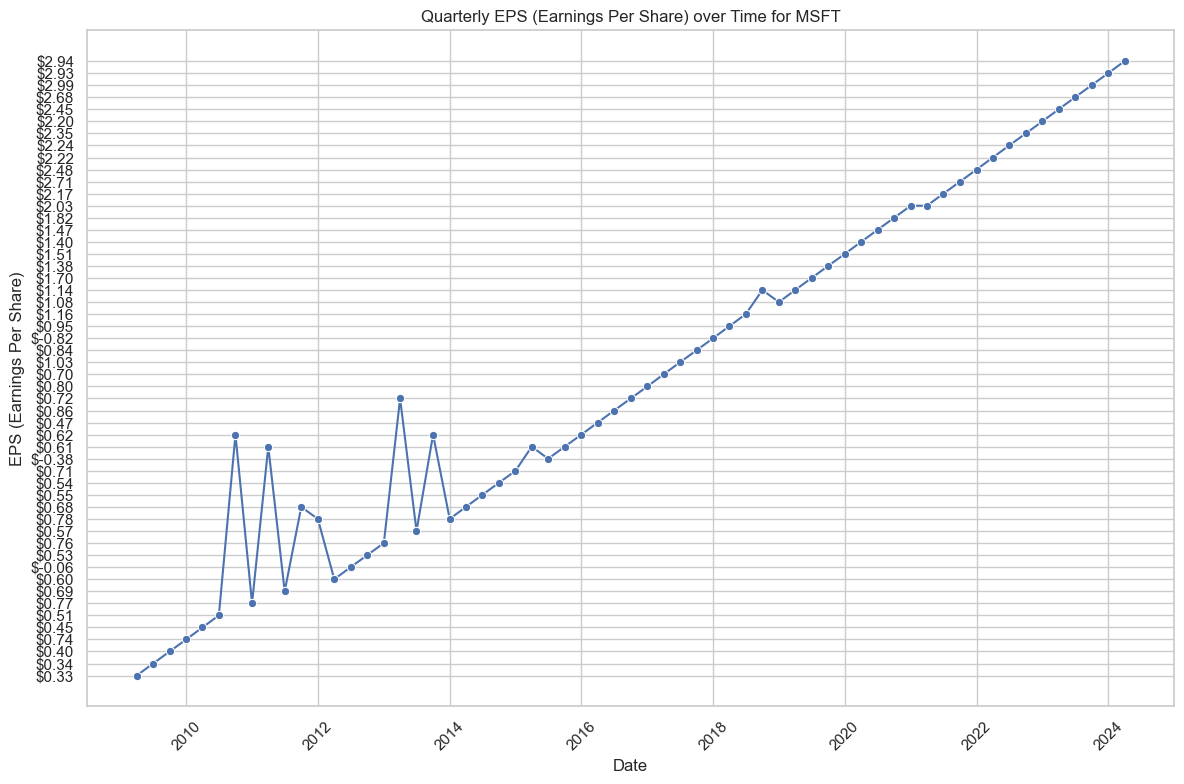

In [11]:
# Configurar Seaborn para las gráficas
sns.set_theme(style="whitegrid")

# Crear la gráfica
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date', y='EPS (Earnings Per Share)', data=df, marker='o')
plt.title(f'Quarterly EPS (Earnings Per Share) over Time for {ticker}')
plt.xlabel('Date')
plt.ylabel('EPS (Earnings Per Share)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()